# Plots for the thesis

libraries

In [1]:
# This project reproduces experimental data

import numpy as np
import scipy as sc
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import time
import os
import sys
sys.path.insert(0, 'C:/Users/Yaiza/PycharmProjects/min_stat_error_GSC/functions/')
import basic_functions as bf
import fake_data_functions as fd
import optimisation_functions as opt


#This command suppresses printing of small floats
np.set_printoptions(suppress=True)

np.set_printoptions(formatter={'float_kind':'{:.3e}'.format})

plot_path = os.path.abspath('C:/Users/Yaiza/PycharmProjects/min_stat_error_GSC/thesis_plots/')
data_path = os.path.abspath('C:/Users/Yaiza/PycharmProjects/min_stat_error_GSC/thesis_data/')

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

Reading data

In [2]:
# READING DATA FROM OPTIMISATION

## Data from optimisation with F=[1,1] and angles from 0 to 2pi
M = 1*10**4
F=[1, 1]
# Reading optimised angles
with open(data_path + "/opt/M=" + str(M) + "_F=" + str(F) + "_opt_theta.txt") as f:
    list_theta_F1 = [[num for num in line.split(' ')] for line in f]
    list_theta_F1 = [[float(item) for item in line] for line in list_theta_F1]
f.close()
# Reading optimised mean sq distance
with open(data_path + "/opt/M=" + str(M) + "_F=" + str(F) + "_opt_mean_distance2.txt") as f:
    list_mean_distance2_F1 = [num for num in f]
    list_mean_distance2_F1 = [float(item) for item in list_mean_distance2_F1]
f.close()

## Data from optimisation with F!=1 from 0 to 2pi
M = 1*10**4
F = [0.99, 0.98]
# Reading optimised angles F!=1 from 0 to 2pi
with open(data_path + "/opt/M=" + str(M) + "_F=" + str(F) + "_opt_theta.txt") as f:
    list_theta_F = [[num for num in line.split(' ')] for line in f]
    list_theta_F = [[float(item) for item in line] for line in list_theta_F]
f.close()

# Reading optimised mean sq distance F!=1 with angles from 0 to 2pi
with open(data_path + "/opt/M=" + str(M) + "_F=" + str(F) + "_opt_mean_distance2.txt") as f:
    list_mean_distance2_F = [num for num in f]
    list_mean_distance2_F = [float(item) for item in list_mean_distance2_F]
f.close()

# READING DATA FROM SIMULATIONS
N = 1*10**6
F = [1, 1]
J = 10**5
## Reading estimated error parameters from experimentalist GSC version
with open(data_path + "/exp/N=" + str(N) + "_J=" + str(J) + "_F=" + str(F) + "_Ps.txt") as f:
    Ps = [[num for num in line.split(' ')] for line in f]
    del Ps[0]
    Ps = [[float(item) for item in line] for line in Ps]
f.close()

## Reading mean vector of experimentalist GSC version
with open(data_path + "/exp/N=" + str(N) + "_J=" + str(J) + "_F=" + str(F) + "_mean_vector.txt") as f:
    mean_vector = [num for num in f]
    del mean_vector[0:17]
    del mean_vector[15:31]
    mean_vector = [float(item) for item in mean_vector]
f.close()

## Reading ps of experimentalist GSC version
with open(data_path + "/exp/N=" + str(N) + "_J=" + str(J) + "_F=" + str(F) + "_pss.txt") as f:
    ps = [num for num in f]
    del ps[0]
    ps = [float(item) for item in ps]
f.close()

## Reading covariance matrix of experimentalist GSC version
with open(data_path + "/exp/N=" + str(N) + "_J=" + str(J) + "_F=" + str(F) + "_cov_matrix.txt") as f:
    cov_matrix = [[num for num in line.split(' ')] for line in f]
    del cov_matrix[0:17]
    del cov_matrix[15:31]
    cov_matrix = [[float(item) for item in line] for line in cov_matrix]
f.close()


label = []
for n in range(25):
    label.append(n + 1)

## Variance of the gaussian distribution, limit of a binomial distirbution B(N,q)

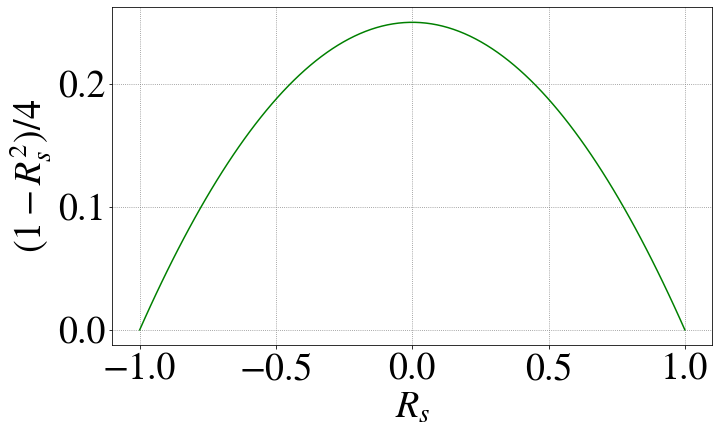

In [3]:
R = np.linspace(-1, 1, 100)

plt.plot(R, (1-R**2) / 4, color='green')
plt.xlabel('$R_s$', fontsize=38)
plt.ylabel('$(1-R_s^2)/4$', fontsize=38)
plt.grid(True, color='0.5', ls=':')
plt.tight_layout()
plt.tick_params(axis='both', labelsize=38)
plt.savefig(plot_path + '/variance.pdf')
plt.show()

## Optimal angles and folded angles merged

### Perfect measurements

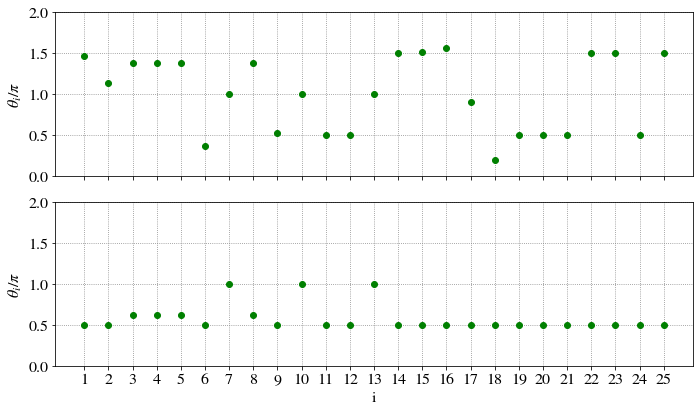

In [4]:
F = [1,1]

plot_list_mean_distance2_F1 = [x for x in list_mean_distance2_F1 if x <= 8.4231e-07]

indexes_F1 = []
for i in range(len(plot_list_mean_distance2_F1)):
    index_F1 = list_mean_distance2_F1.index(plot_list_mean_distance2_F1[i])
    indexes_F1.append(index_F1)

plot_list_theta_F1 = []
for i in indexes_F1:
    plot_list_theta_F1.append(list_theta_F1[i])

min_F1 = np.min(plot_list_mean_distance2_F1)
index_F1 = plot_list_mean_distance2_F1.index(min_F1)
theta_min_F1 = plot_list_theta_F1[index_F1]

while np.linalg.cond(opt.L(np.array(theta_min_F1),F))>50:
    del plot_list_mean_distance2_F1[index_F1]
    del plot_list_theta_F1[index_F1]
    del indexes_F1[index_F1]

    min_F1 = np.min(plot_list_mean_distance2_F1)
    index_F1 = plot_list_mean_distance2_F1.index(min_F1)
    theta_min_F1 = plot_list_theta_F1[index_F1]

plot_list_theta_F1 = np.array(plot_list_theta_F1) / np.pi

vec_theta_F1 = np.array(theta_min_F1) / np.pi
fol_theta_F1 = np.array([2 - theta if theta > 1 else theta for theta in vec_theta_F1])

mod_theta_F1 = [0 for i in range(25)]

deg_angles = [1, 2, 6, 9, 15, 16, 17, 18]

for i in range(25):
    if i+1 in deg_angles:
        mod_theta_F1[i] = 0.5
    else:
        mod_theta_F1[i] = fol_theta_F1[i]
        
mod_theta_F1 = np.array(mod_theta_F1)

# Plotting optimal angles and modified angles together
ax1 = plt.subplot(211)
plt.plot(label, np.array(theta_min_F1) / np.pi, linestyle=' ', marker='o', alpha=1, color='green')
plt.ylabel('$\\theta_i/\\pi$')
plt.grid(True, color='0.5', ls=':')
plt.xticks(range(1, len(theta_min_F1)+1))
plt.tight_layout()
plt.tick_params('x', labelbottom=False)
plt.ylim([0, 2])

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(label, mod_theta_F1, linestyle=' ', marker='o', alpha=1, color='green')
# plt.title("Modified optimal angles")
plt.xlabel('i')
plt.ylabel('$\\theta_i/\\pi$')
plt.grid(True, color='0.5', ls=':')
plt.tight_layout()
plt.ylim([0, 2])
plt.savefig(plot_path + '/merged_angles25.pdf')
plt.show()

### Imperfect measurements

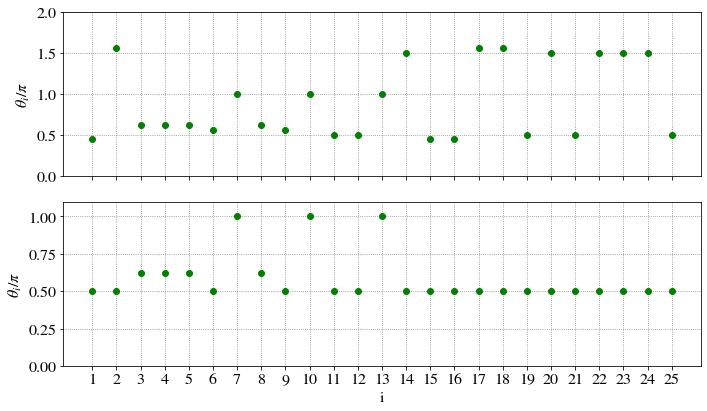

In [5]:
F = [0.99,0.98]

plot_list_mean_distance2_F = [x for x in list_mean_distance2_F if x <= 8.9456e-07]

indexes_F = []
for i in range(len(plot_list_mean_distance2_F)):
    index_F = list_mean_distance2_F.index(plot_list_mean_distance2_F[i])
    indexes_F.append(index_F)

plot_list_theta_F = []
for i in indexes_F:
    plot_list_theta_F.append(list_theta_F[i])

min_F = np.min(plot_list_mean_distance2_F)
index_F = plot_list_mean_distance2_F.index(min_F)
theta_min_F = plot_list_theta_F[index_F]

while np.linalg.cond(opt.L(np.array(theta_min_F),F))>50:
    del plot_list_mean_distance2_F[index_F]
    del plot_list_theta_F[index_F]
    del indexes_F[index_F]
    
    min_F = np.min(plot_list_mean_distance2_F)
    index_F = plot_list_mean_distance2_F.index(min_F)
    theta_min_F = plot_list_theta_F[index_F]

plot_list_theta_F = np.array(plot_list_theta_F) / np.pi

vec_theta_F = np.array(theta_min_F) / np.pi
fol_theta_F = np.array([2 - theta if theta > 1 else theta for theta in vec_theta_F])

mod_theta_F = [0 for i in range(25)]

deg_angles = [1, 2, 6, 9, 15, 16, 17, 18]

for i in range(25):
    if i+1 in deg_angles:
        mod_theta_F[i] = 0.5
    else:
        mod_theta_F[i] = fol_theta_F[i]
        
mod_theta_F = np.array(mod_theta_F)

# Plotting optimal angles and modified angles together
ax1 = plt.subplot(211)
plt.plot(label, np.array(theta_min_F) / np.pi, linestyle=' ', marker='o', alpha=1, color='green')
plt.ylabel('$\\theta_i/\\pi$')
plt.grid(True, color='0.5', ls=':')
plt.xticks(range(1, len(theta_min_F1)+1))
plt.tight_layout()
plt.tick_params('x', labelbottom=False)
plt.ylim([0, 2])

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(label, mod_theta_F, linestyle=' ', marker='o', alpha=1, color='green')
# plt.title("Modified optimal angles")
plt.xlabel('i')
plt.ylabel('$\\theta_i/\\pi$')
plt.grid(True, color='0.5', ls=':')
plt.tight_layout()
plt.ylim([0, 1.1])
plt.savefig(plot_path + '/merged_angles25F.pdf')
plt.show()

## Degeneracy of the mean squared distance

i = 0


--- loop finished ---


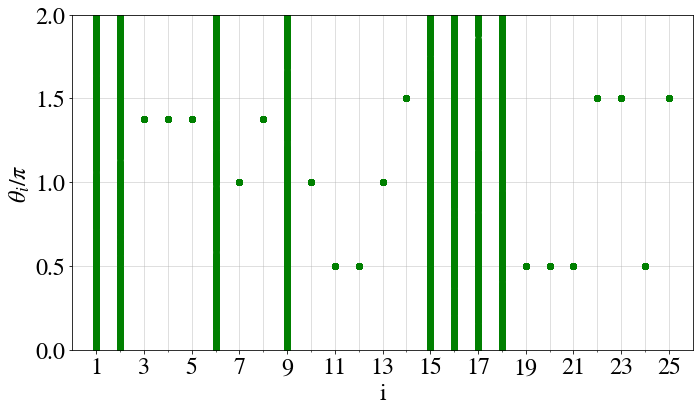

--- plot created ---


In [6]:
F = [1,1]

plot_list_mean_distance2_F1 = [x for x in list_mean_distance2_F1 if x <= 8.4231e-07]

indexes_F1 = []
for i in range(len(plot_list_mean_distance2_F1)):
    index_F1 = list_mean_distance2_F1.index(plot_list_mean_distance2_F1[i])
    indexes_F1.append(index_F1)

plot_list_theta_F1 = []
for i in indexes_F1:
    plot_list_theta_F1.append(list_theta_F1[i])

min_F1 = np.min(plot_list_mean_distance2_F1)
index_F1 = plot_list_mean_distance2_F1.index(min_F1)
theta_min_F1 = plot_list_theta_F1[index_F1]

while np.linalg.cond(opt.L(np.array(theta_min_F1),F))>50:
    del plot_list_mean_distance2_F1[index_F1]
    del plot_list_theta_F1[index_F1]
    del indexes_F1[index_F1]

    min_F1 = np.min(plot_list_mean_distance2_F1)
    index_F1 = plot_list_mean_distance2_F1.index(min_F1)
    theta_min_F1 = plot_list_theta_F1[index_F1]

fig = plt.figure()
ax = fig.add_subplot(111)

Y = 10 ** 3
for i in range(Y):
    if i % 10 ** 4 == 0:
        print("i =", i)
        print("\n")

    mod_theta_F1 = [0 for i in range(25)]

    deg_angles = [1, 2, 6, 9, 15, 16, 17, 18]

    for i in range(25):
        if i + 1 in deg_angles:
            mod_theta_F1[i] = 2*np.random.random()
        else:
            mod_theta_F1[i] = vec_theta_F1[i]

    mod_theta_F1 = np.array(mod_theta_F1)

    if np.abs(opt.mean_distance2(mod_theta_F1 * np.pi, 10 ** 6, [1, 1]) - min_F1) > 10 ** (-12):
        print("mod = ", mod_theta_F1)
        print("<D^2>_min =", min_F1)
        print("<D^2>_mod =", opt.mean_distance2(mod_theta_F1 * np.pi, 10 ** 6, [1, 1]))
        print("diff =", np.abs(opt.mean_distance2(mod_theta_F1 * np.pi, 10 ** 6, [1, 1]) - min_F1))
        print("\n")
    else:
        plt.plot(label, mod_theta_F1, linestyle=' ', marker='o', alpha=0.5, color='green')
        
print("--- loop finished ---")

ax.set_xlabel('i', fontsize=24)
ax.set_ylabel('$\\theta_i/\\pi$', fontsize=24)

# I want max x axis to be 500
ax.set_xlim(0, 26)
# I want max y axis to be 300
ax.set_ylim(0, 2)

# Set major ticks for x axis
major_xticks = range(1, len(plot_list_theta_F1[0])+1,2)

# Set major ticks for y axis
major_yticks = np.arange(0, 2.5, 0.5)

# I want minor ticks for x axis
minor_xticks = np.arange(2, 26, 2)

# I want minor ticks for y axis
minor_yticks = np.arange(0, 2.5, 0.5)

# Specify tick label size
ax.tick_params(axis = 'both', which = 'major', labelsize=24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 0) # Suppress minor tick labels

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor = True)

ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor = True)

# Set both ticks to be outside
ax.tick_params(which = 'both', direction = 'out')

# Specify different settings for major and minor grids
ax.grid(which = 'minor', alpha = 0.5)
ax.grid(which = 'major', alpha = 0.5)

plt.tight_layout()
plt.savefig(plot_path + '/degeneracy_proof.pdf')
plt.show()

print("--- plot created ---")

## Histograms of the error parameters

HISTOGRAMS
For each error parameter, Ps[k], we plot the following:
 - a histogram with the data obtained simulating the calibration with the GSC version with all angles pi/2
 - a gaussian distribution with the theoretical variance and mean of the GSC version with all angles pi/2

#------------- PERFECT MEASUREMENTS -------------#
    


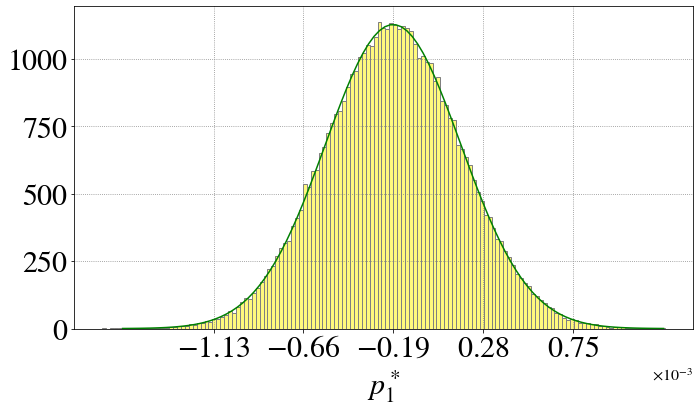

theoretical mean = -0.00019150021335406753
theoretical var = 1.249997273676496e-07


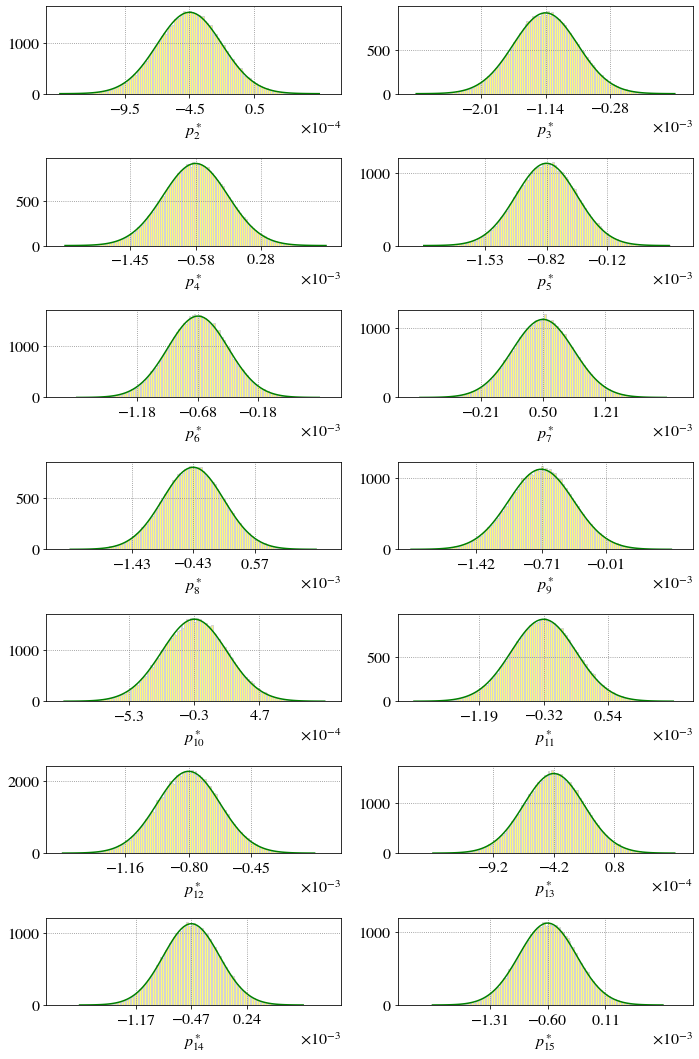

In [7]:
print("#------------- PERFECT MEASUREMENTS -------------#")
print("    ")

F=[1, 1]
N=10**6
J=10**5

# PLOTTING THE HISTOGRAM FOR p1

k = 0

## Theoretical parameters of the GSC version with all angles pi/2
var_th = cov_matrix[k][k]
mean_th = mean_vector[k]

## Plotting the histogram with the data obtained simulating the calibration with the GSC version with all angles pi/2
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.hist(Ps[k], bins='auto', color='#fff97dff', edgecolor='grey', stacked=True, density=True)
plt.xlabel(r"$p^*_{%s}$" % str(k+1), fontsize=30)
plt.tick_params(axis='both', labelsize=30)

# Creating the gaussian distribution with theoretical variance and mean for the GSC version with all angles pi/2
x = np.linspace(mean_th - 4 * np.sqrt(var_th), mean_th + 4 * np.sqrt(var_th), 100)
# plt.plot(x, stats.norm.pdf(x, mean_th, np.sqrt(var_th)), color='#fff97dff', linestyle='-')
plt.plot(x, stats.norm.pdf(x, mean_th, np.sqrt(var_th)), color='g', linestyle='-')

tick_marks = np.arange(mean_th - 4 * np.sqrt(var_th), mean_th + 4 * np.sqrt(var_th), (mean_th + 4 * np.sqrt(var_th) - (mean_th - 4 * np.sqrt(var_th)))/6)
tick_marks = np.delete(tick_marks, 0)
tick_marks = np.around(tick_marks , 5)   

plt.xticks(tick_marks)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)

plt.grid(True, color='0.5', ls=':')
plt.tight_layout()
plt.savefig(plot_path + '/histogram_P' +  str(k+1) + '.pdf')
plt.show()

print("theoretical mean =", mean_th)
print("theoretical var =", var_th)


# PLOTTING THE HISTOGRAM FOR p2,..., p15

f = plt.figure(figsize=(10,15))
k = 1
while k < 15:
    ## Theoretical parameters of the GSC version with all angles pi/2
    var_th = cov_matrix[k][k]
    mean_th = mean_vector[k]

    ## Plotting the histogram with the data obtained simulating the calibration with the GSC version with all angles pi/2
    plt.subplot(7, 2, k)
    plt.grid(True, color='0.5', ls=':')
    plt.hist(Ps[k], bins='auto', color='#fff97dff', edgecolor='lightgrey', stacked=True, density=True)
    plt.xlabel(r"$p^*_{%s}$" % str(k+1))

    # Creating the gaussian distribution with theoretical variance and mean for the GSC version with all angles pi/2
    x = np.linspace(mean_th - 4 * np.sqrt(var_th), mean_th + 4 * np.sqrt(var_th), 100)
    plt.plot(x, stats.norm.pdf(x, mean_th, np.sqrt(var_th)), color='g', linestyle='-')
    
    tick_marks = np.arange(mean_th - 4 * np.sqrt(var_th), mean_th + 4 * np.sqrt(var_th), (mean_th + 4 * np.sqrt(var_th) - (mean_th - 4 * np.sqrt(var_th)))/4)
    tick_marks = np.delete(tick_marks, 0)
    tick_marks = np.around(tick_marks , 5)   
    
    plt.xticks(tick_marks)
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
    
    k += 1

plt.tight_layout()
plt.savefig(plot_path + '/histogram_Ps.pdf')
plt.show()

## Mean square distance as a function of theta

Getting data from analytical functions in optimisation_functions

In [8]:
## GETTING MEAN SQUARED DISTANCE [i.e., tr(L^(-1)*Sigma*L^(-T))] IN TERMS OF ONE THETA
# """

N = 10**(6) # Number of runs of the "experiment in the lab"
R = 10**5 # Number of values of theta
delta = 2*np.pi / R
F = [1, 1]

list_theta = []
list_mean_distance2 = []

for r in range(R):
    if r % 10 ** 4 == 0:
        print("r =", r)

    theta = r*delta
    
    vec_theta = [theta for i in range(25)]
    
    mean_distance2 = opt.mean_distance2(vec_theta, N, F)

    list_theta.append(theta)
    list_mean_distance2.append(mean_distance2)

print("   ")
print("--- finished ---")

min_mean_distance2 = np.min(list_mean_distance2)
index = list_mean_distance2.index(min_mean_distance2)
theta_min = list_theta[index]

print("   ")
print("min_mean_distance2*N =", "{:.2f}".format(min_mean_distance2*N))
print("<D^2>(2*pi-theta_min)*N =", "{:.2f}".format(opt.mean_distance2([2*np.pi-theta_min for i in range(25)], N, F)*N))
print("<D^2>(pi/2)*N =", "{:.2f}".format(opt.mean_distance2([np.pi / 2 for i in range(25)], N, F)*N))
print("factor = ", "{:.2f}".format(min_mean_distance2 / opt.mean_distance2([np.pi / 2 for i in range(25)], N, F)))
print("index =", index)
print("theta_min / np.pi =", theta_min / np.pi)

list_theta = np.array(list_theta) / np.pi
theta_min = np.array(theta_min) / np.pi

r = 0
r = 10000
r = 20000
r = 30000
r = 40000
r = 50000
r = 60000
r = 70000
r = 80000
r = 90000
   
--- finished ---
   
min_mean_distance2*N = 1.55
<D^2>(2*pi-theta_min)*N = 1.59
<D^2>(pi/2)*N = 1.84
factor =  0.84
index = 71353
theta_min / np.pi = 1.4270599999999998


Plotting

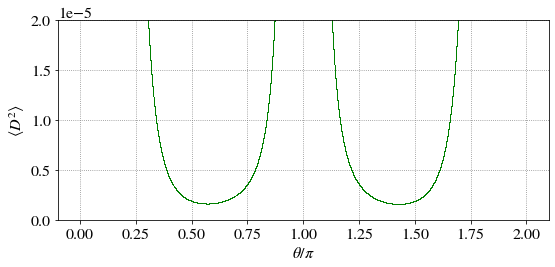

In [9]:
f = plt.figure(figsize=(8,4))
plt.subplot(1, 1, 1)
plt.plot(list_theta, list_mean_distance2, linestyle=' ', marker=',', color='g')
plt.xlabel(r'$\theta/\pi$')
plt.ylabel(r'$\langle D^2\rangle$')
# plt.xlim([1.428 - 2, 1.428 + 2])
plt.grid(True, color='0.5', ls=':')
plt.ylim([0, 2*10**(-5)])
plt.tight_layout()
plt.savefig(plot_path + '/DvsTheta.pdf')
plt.show()

## Are we in a global minima?

Perfect measurements

In [10]:
print("----- PERFECT MEASUREMENTS -----")
print("   ")
F = [1,1]

count_mean_distance2_F1 = [x for x in list_mean_distance2_F1]

count_indexes_F1 = []
for i in range(len(count_mean_distance2_F1)):
    count_index_F1 = list_mean_distance2_F1.index(count_mean_distance2_F1[i])
    count_indexes_F1.append(count_index_F1)

count_theta_F1 = []
for i in count_indexes_F1:
    count_theta_F1.append(list_theta_F1[i])

count_min_F1 = np.min(count_mean_distance2_F1)
count_index_F1 = count_mean_distance2_F1.index(count_min_F1)
count_theta_min_F1 = count_theta_F1[count_index_F1]

while np.linalg.cond(opt.L(np.array(count_theta_min_F1),F))>50:
    del count_mean_distance2_F1[count_index_F1]
    del count_theta_F1[count_index_F1]
    del count_indexes_F1[count_index_F1]

    count_min_F1 = np.min(count_mean_distance2_F1)
    count_index_F1 = count_mean_distance2_F1.index(count_min_F1)
    count_theta_min_F1 = count_theta_F1[count_index_F1]

count = 0
for i in range(len(count_mean_distance2_F1)):
    if count_mean_distance2_F1[i] < 8.4231e-07:
        count = count + 1

print("% of <D^2> < 8.4231e-07 =", count/len(count_mean_distance2_F1)*100)
print("rel error =", (8.4231e-07-8.4230e-07)/8.4230e-07*100)

print("   ")
print("----- IMPERFECT MEASUREMENTS -----")
print("   ")

F = [0.99,0.98]

count_mean_distance2_F = [x for x in list_mean_distance2_F]

count_indexes_F = []
for i in range(len(count_mean_distance2_F)):
    count_index_F = list_mean_distance2_F.index(count_mean_distance2_F[i])
    count_indexes_F.append(count_index_F)

count_theta_F = []
for i in count_indexes_F:
    count_theta_F.append(list_theta_F[i])

count_min_F = np.min(count_mean_distance2_F)
count_index_F = count_mean_distance2_F.index(count_min_F)
count_theta_min_F = count_theta_F[count_index_F]

while np.linalg.cond(opt.L(np.array(count_theta_min_F),F))>50:
    del count_mean_distance2_F[count_index_F]
    del count_theta_F[count_index_F]
    del count_indexes_F[count_index_F]

    count_min_F = np.min(count_mean_distance2_F)
    count_index_F = count_mean_distance2_F.index(count_min_F)
    count_theta_min_F = count_theta_F[count_index_F]

count = 0
for i in range(len(count_mean_distance2_F)):
    if count_mean_distance2_F[i] < 8.9456e-07:
        count = count + 1

print("% of <D^2> < 8.9456e-07 =", count/len(count_mean_distance2_F)*100)
print("rel error =", (8.9456e-07-8.9455e-07)/8.9455e-07*100)

----- PERFECT MEASUREMENTS -----
   
% of <D^2> < 8.4231e-07 = 3.2537523924649947
rel error = 0.0011872254541213675
   
----- IMPERFECT MEASUREMENTS -----
   
% of <D^2> < 8.9456e-07 = 28.157099697885197
rel error = 0.001117880498581888
